# Plot up map of pCO2-Residual magnitude and Histogram of its Values in SOCAT

In [19]:
# Modules

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cmocean as cm            # really nice colorbars
import matplotlib.pyplot as plt # for making plots
%matplotlib inline
%config InlineBackend.figure_format = 'jpeg'
%config InlineBackend.print_figure_kwargs = {'dpi':1200}

In [20]:
%run _Val_Mapping.ipynb

In [22]:
# Open file with pCO2_DIC, pCO2_T, and SOCAT pCO2
socat_dir = "/data/artemis/workspace/vbennington/SOCAT/processed"
#fname = f"{socat_dir}/SOCAT_Takahashi_pCO2_pCO2T_pCO2DIC_2D_mon_1x1_198201-202012.nc"
fname = f"{socat_dir}/SOCAT_pCO2_pCO2T_pCO2DIC_2D_mon_1x1_198201-201912.nc"
run_name = "our_pco2"  # Change run name if change fname
socat = xr.open_dataset(f'{fname}')

In [8]:
print(socat)

<xarray.Dataset>
Dimensions:     (time: 468, xlon: 360, ylat: 180)
Coordinates:
  * time        (time) datetime64[ns] 1982-01-15 1982-02-15 ... 2020-12-15
  * ylat        (ylat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * xlon        (xlon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    pCO2_T      (time, ylat, xlon) float64 ...
    pCO2_DIC    (time, ylat, xlon) float64 nan nan nan nan ... nan nan nan nan
    pCO2        (time, ylat, xlon) float64 ...
    socat_mask  (time, ylat, xlon) float64 ...
    pCO2_mean   (ylat, xlon) float64 ...


In [23]:
# Get mean of the absolute value
mab = xr.Dataset({'abs_resid':(['lat','lon'],np.nanmean(np.abs(socat.pCO2_DIC.values),axis=0))},
                 coords ={'lat':(['lat'],socat.ylat),
                         'lon':(['lon'],socat.xlon)})

/home/vbennington/.conda/envs/dev2/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [24]:
print(mab)

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360)
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    abs_resid  (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan


/home/vbennington/.conda/envs/dev2/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/home/vbennington/.conda/envs/dev2/lib/python3.6/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


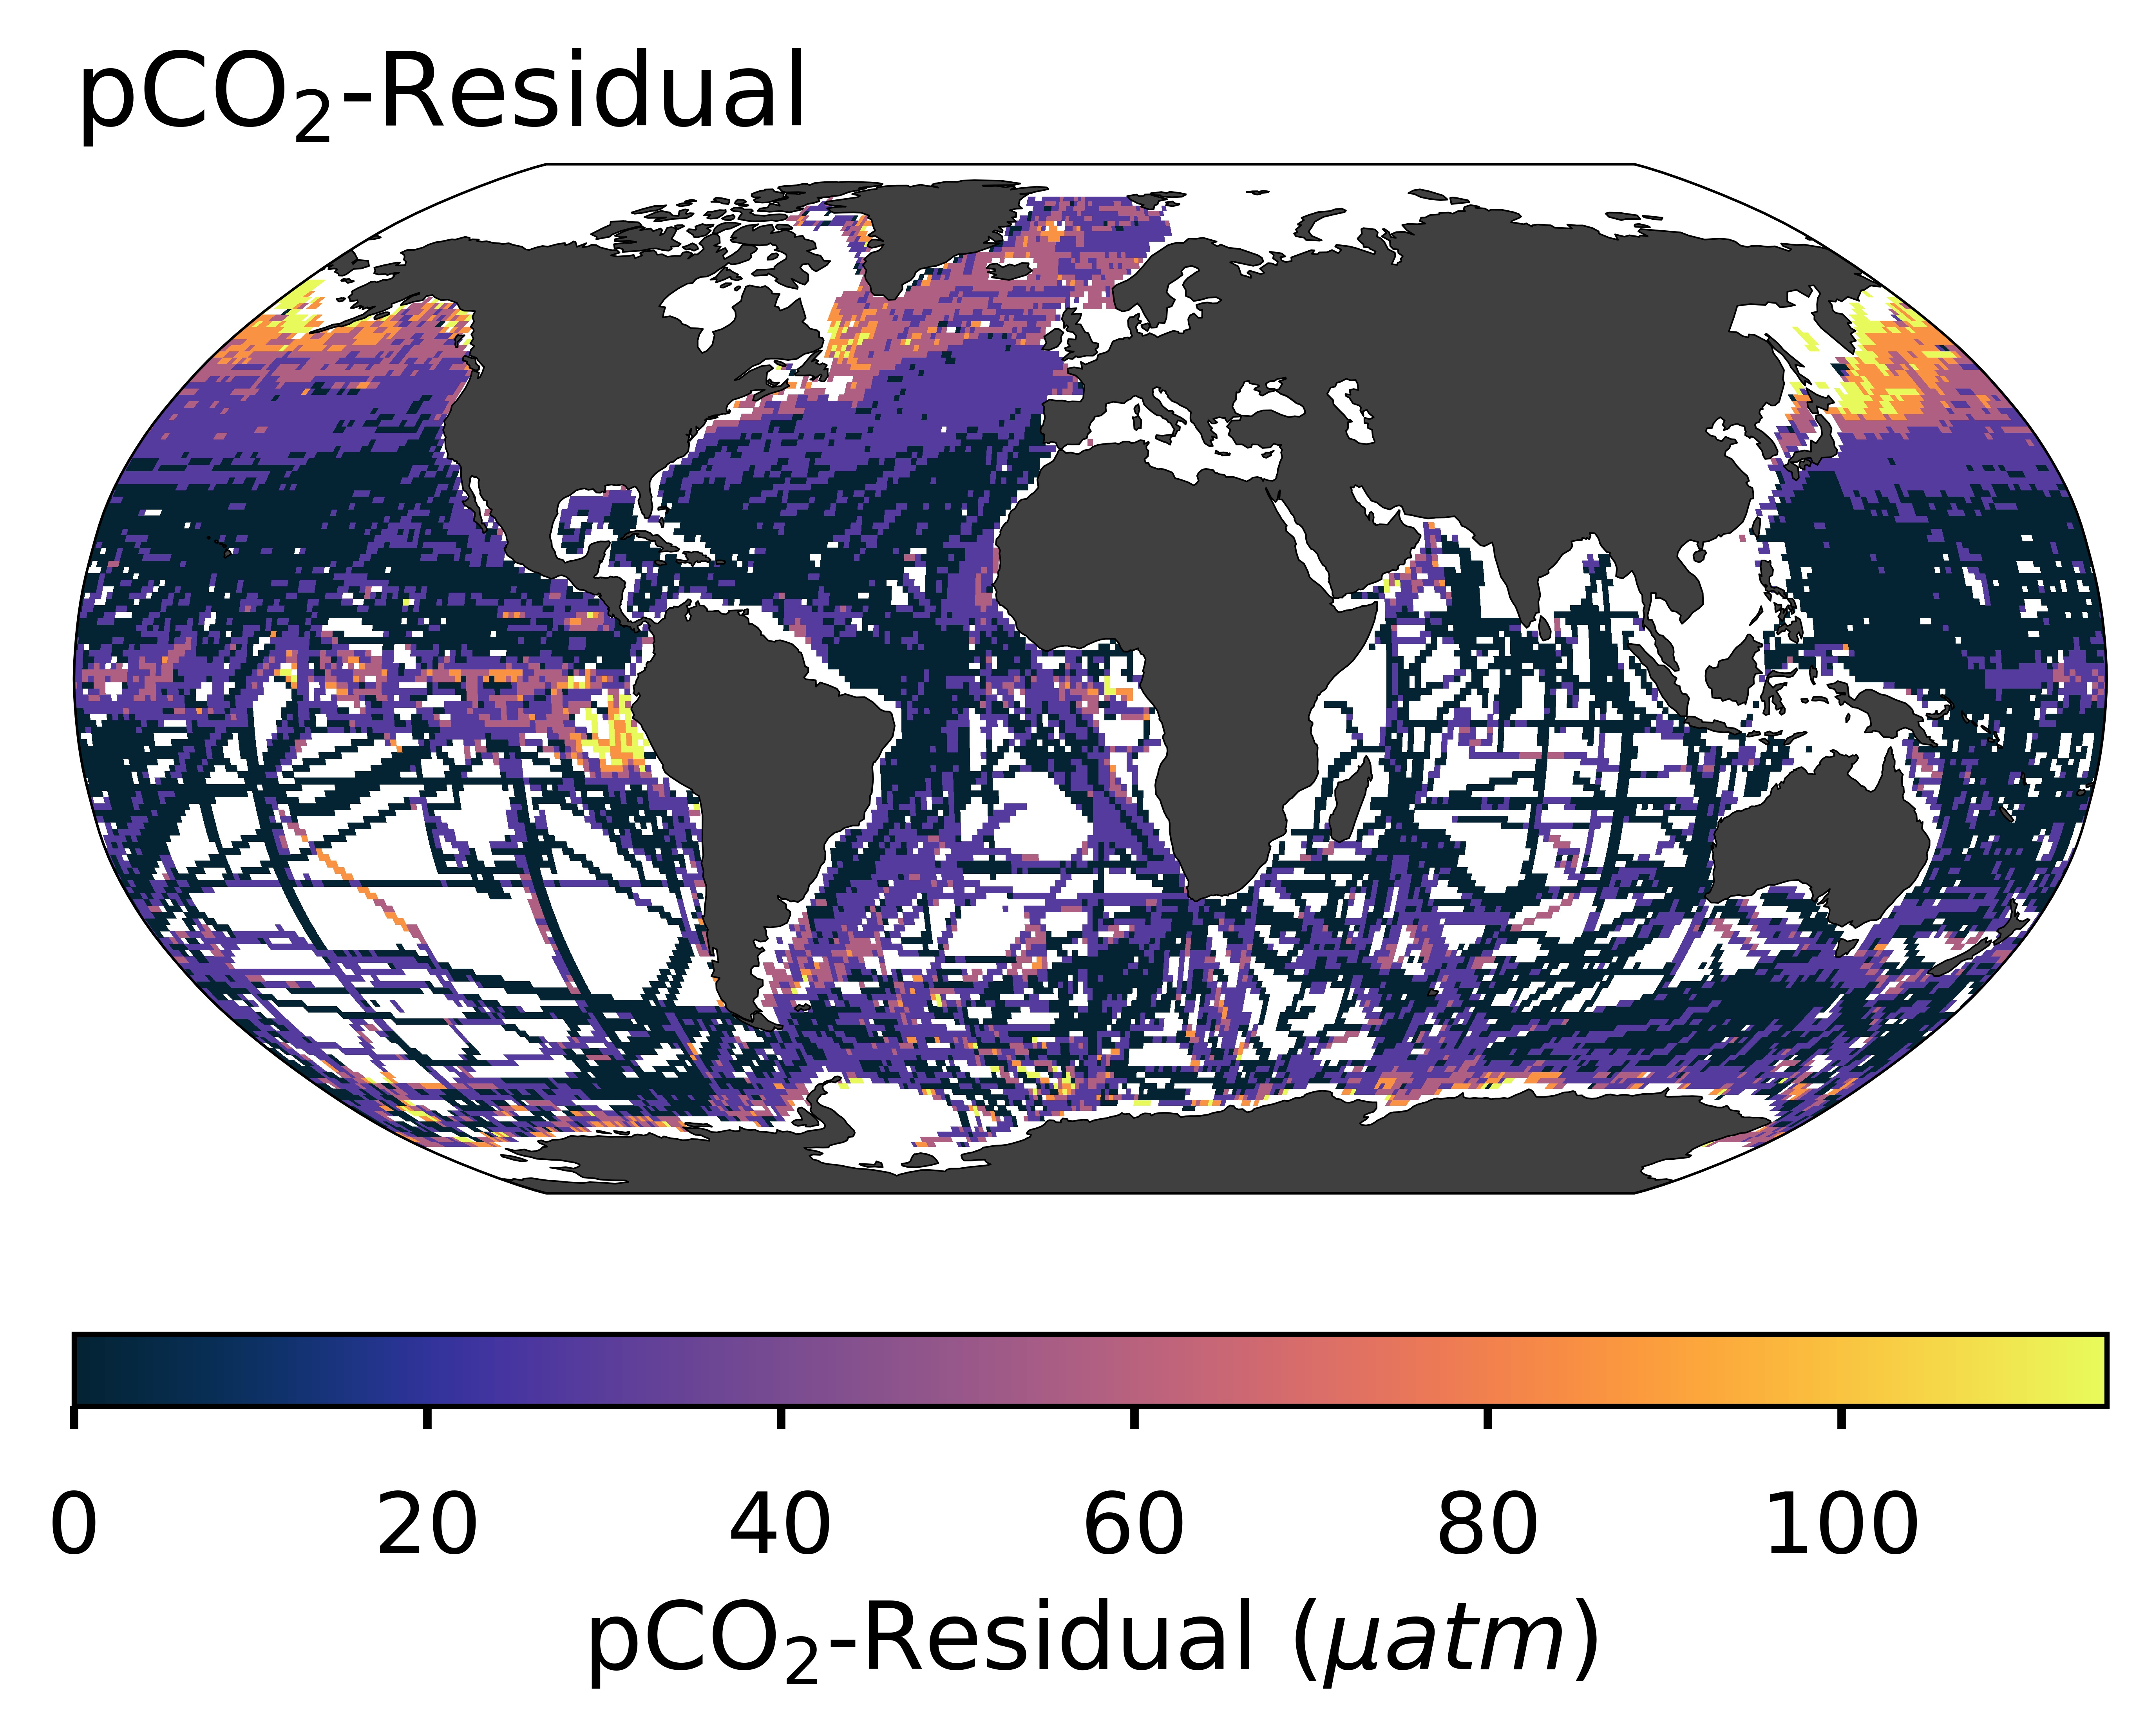

In [48]:
vrange = [0, 115, 5]
fig_shape = (1,1)
cmap = cm.cm.thermal
lab = f'pCO$_2$-Residual ($\mu atm$)'
      
with plt.style.context('seaborn-talk'):
    fig = plt.figure(figsize=(6,3.5))

    ### Mask
    dia = SpatialMap2(nrows_ncols=fig_shape, fig=fig, cbar_location='bottom', cbar_orientation='horizontal')
    data1 = np.where(mab.abs_resid.values>vrange[1],vrange[1],mab.abs_resid.values)
    wrap_data, wrap_lon = add_cyclic_point(data1, coord=mab.lon)
    sub = dia.add_plot(lat = mab.lat, 
                           lon = wrap_lon, 
                           data = wrap_data, 
                           vrange=vrange[0:2],
                           ncolors=6,
                           cmap=cmap, 
                           ax=0)
    dia.set_title(f"pCO$_2$-Residual", 0, loc="left")
    col = dia.add_colorbar(sub)
    dia.set_cbar_xlabel(col, lab)
    
fig.savefig(f"/home/vbennington/pCO2_Residual/SOCAT_residual_{run_name}_MAV_6colors_map.eps",format='eps',dpi=1200)
plt.show()

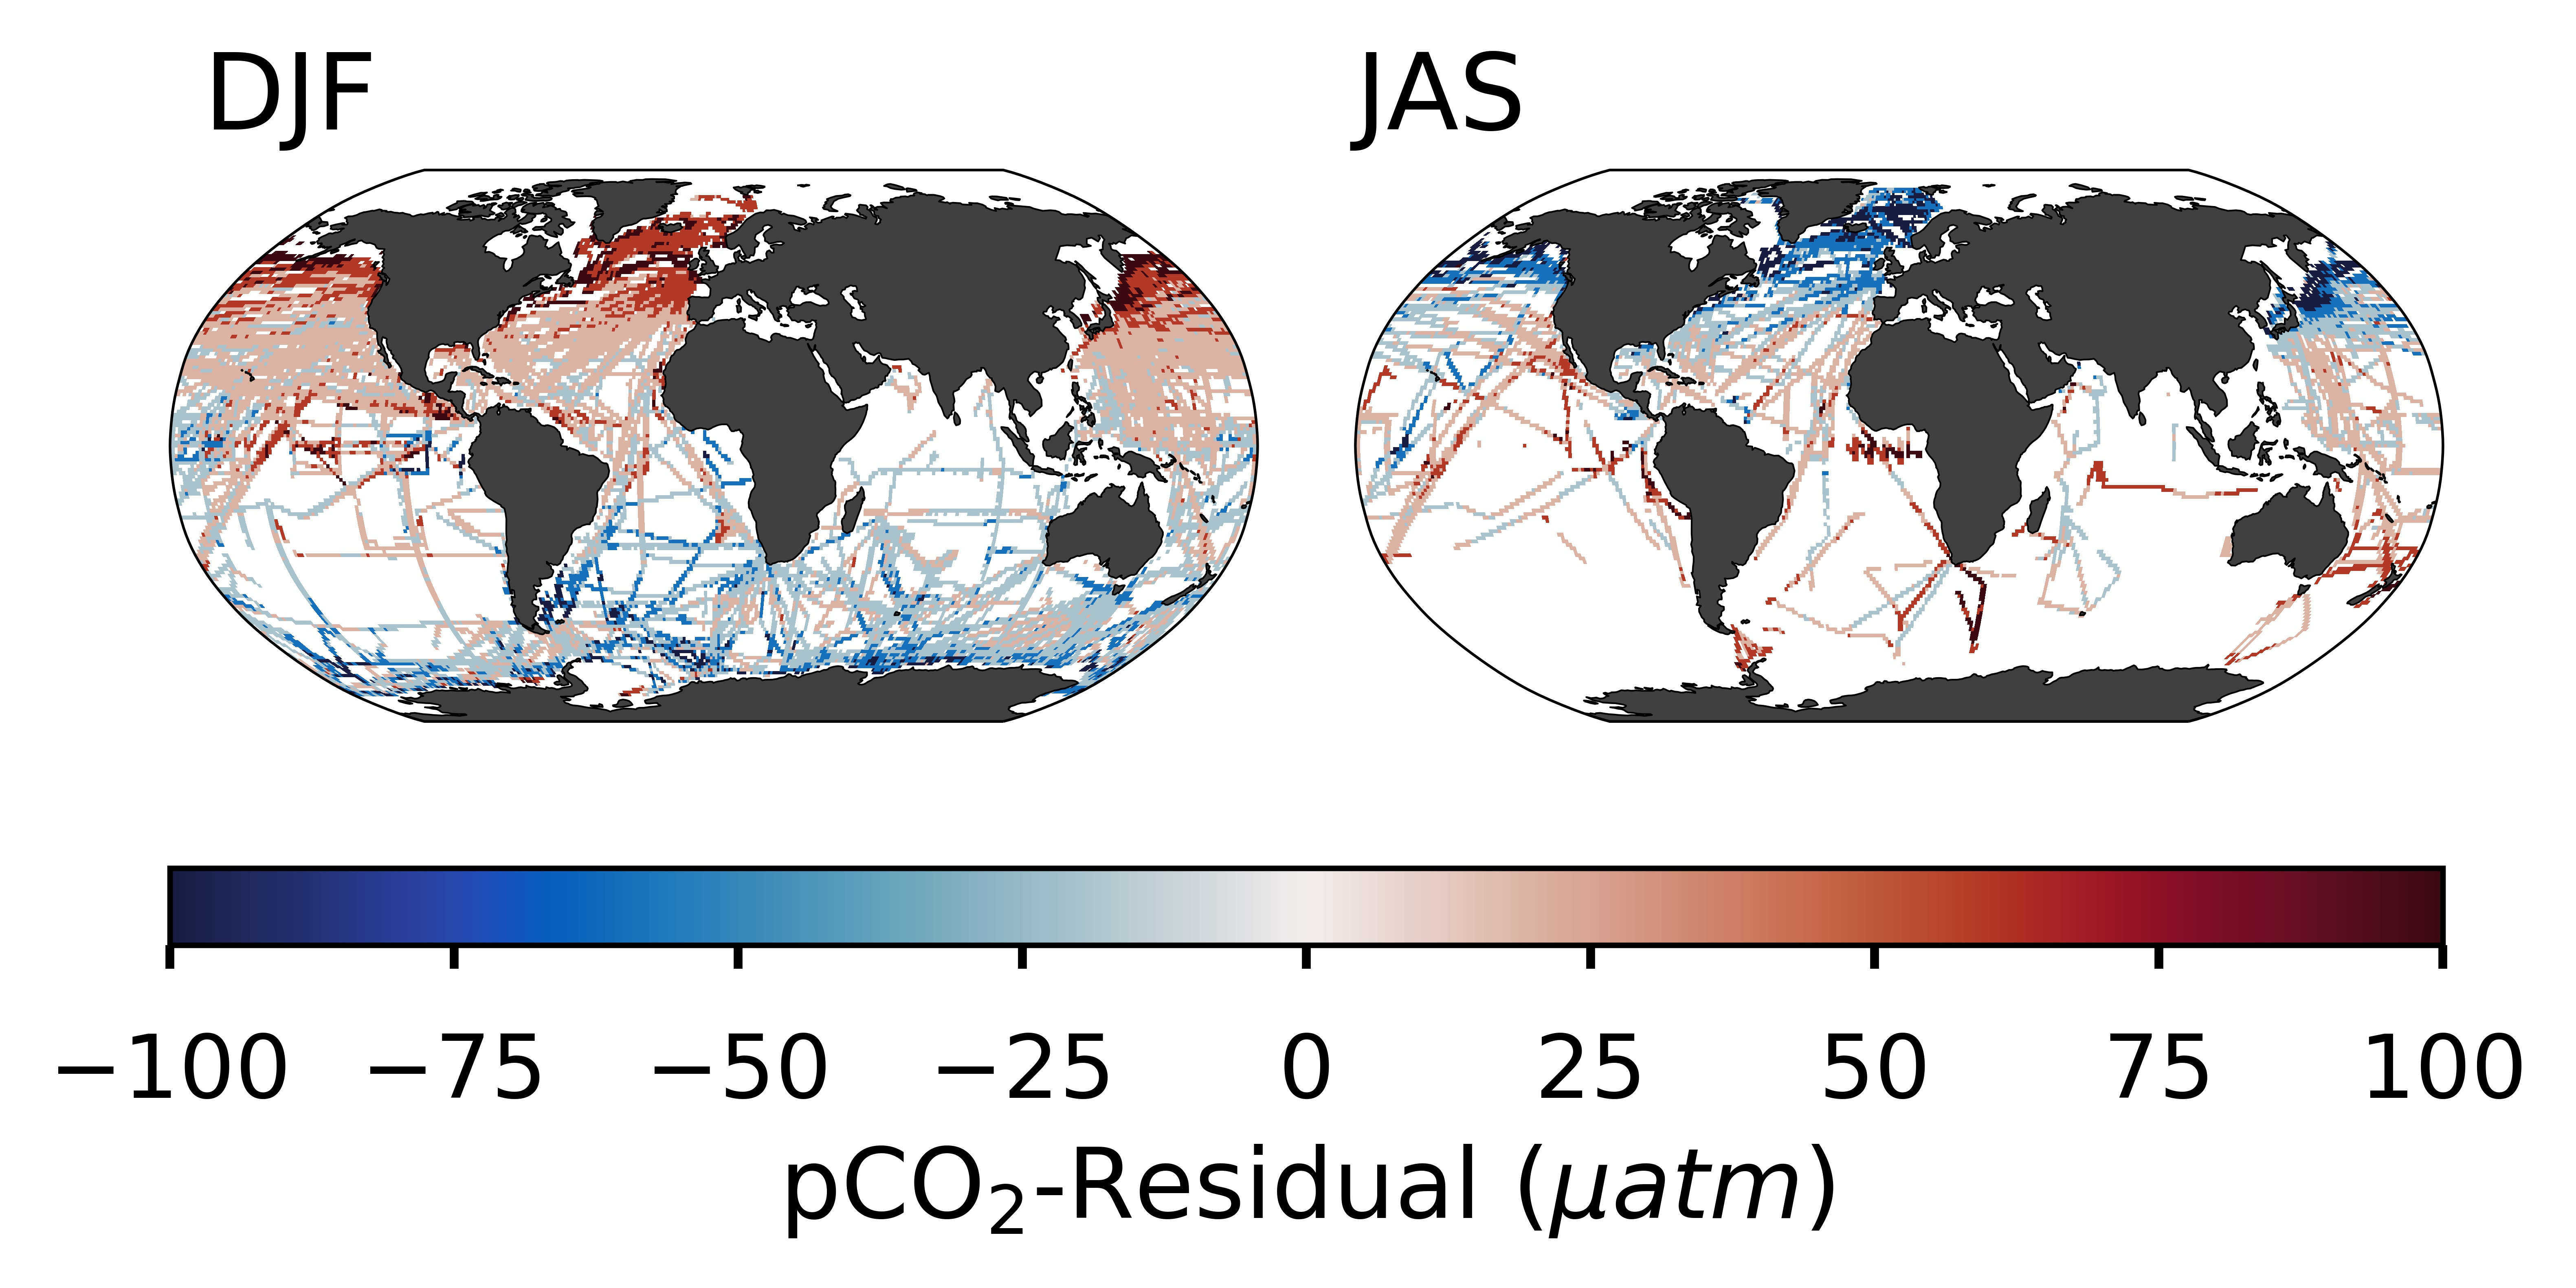

In [50]:
vrange = [-100, 100, 5]
fig_shape = (1,2)
cmap = cm.cm.balance
lab = f'pCO$_2$-Residual ($\mu atm$)'
      
with plt.style.context('seaborn-talk'):
    fig = plt.figure(figsize=(6,3.5))
    #Initiat Plot/Figure:
    dia = SpatialMap2(nrows_ncols=fig_shape, fig=fig, cbar_location='bottom', cbar_orientation='horizontal')
    # Subplot 1 (DJF)
    data1 = socat.pCO2_DIC.groupby("time.month").mean("time").sel(month=[12,1,2]).mean("month")
    #wrap_data, wrap_lon = add_cyclic_point(data1, coord=socat.xlon)
    sub = dia.add_plot(lat = socat.ylat, 
                           lon = socat.xlon, 
                           data = data1, 
                           vrange=vrange[0:2], 
                           ncolors=7,
                           cmap=cmap, 
                           ax=0)
    dia.set_title(f" DJF", 0, loc="left")
    col = dia.add_colorbar(sub)
    dia.set_cbar_xlabel(col, lab)
    
    data1 = socat.pCO2_DIC.groupby("time.month").mean("time").sel(month=slice(7,8,9)).mean("month")
    #wrap_data, wrap_lon = add_cyclic_point(data1, coord=socat.xlon)
    sub = dia.add_plot(lat = socat.ylat, 
                           lon = socat.xlon, 
                           data = data1, 
                           vrange=vrange[0:2],
                           ncolors=7,
                           cmap=cmap, 
                           ax=1)
    dia.set_title(f"JAS", 1, loc="left")
    col = dia.add_colorbar(sub)
    dia.set_cbar_xlabel(col, lab)
    
fig.savefig(f"/home/vbennington/pCO2_Residual/SOCAT_residual_{run_name}_DJF_JAS_7colors_map.eps",format='eps',dpi=1200)
plt.show()

## Plot histgram of pCO2-Residual in SOCAT

In [51]:
stacked = socat.pCO2_DIC.stack(z=('time','ylat','xlon'))

In [52]:
reduced = stacked[~np.isnan(stacked)]

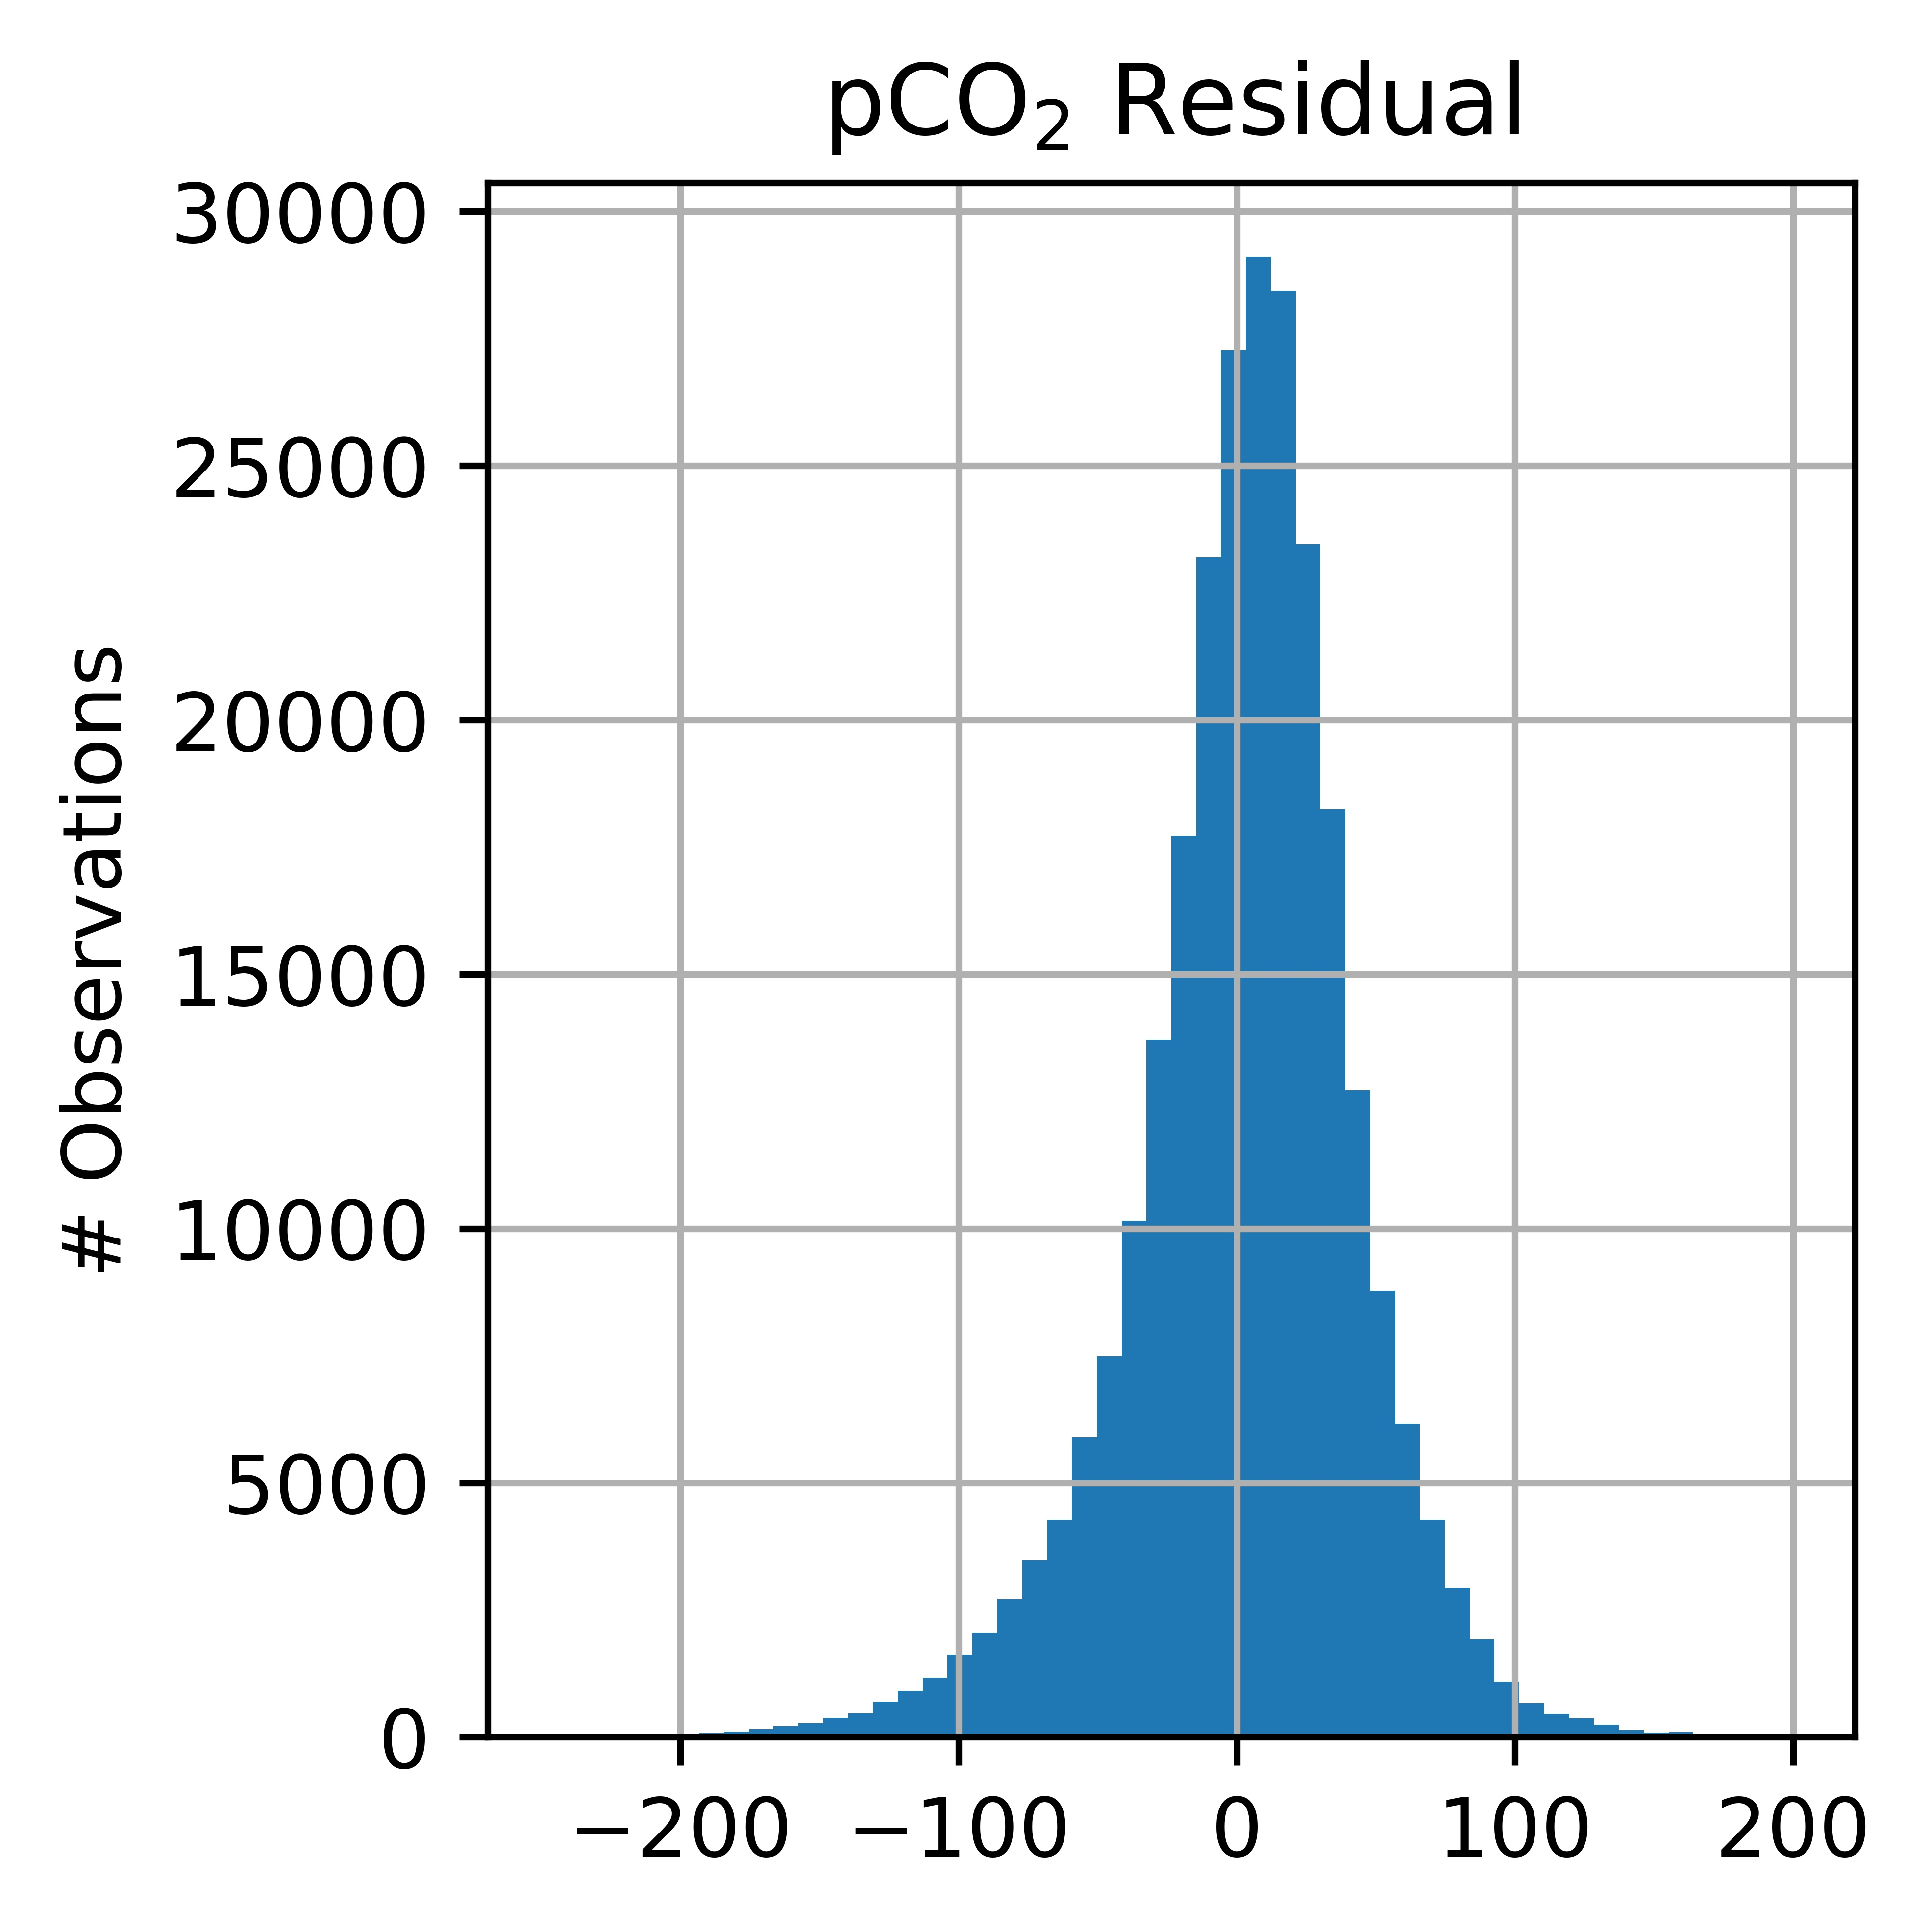

In [54]:
fig = plt.figure(figsize=(3,3.5))
plt.hist(reduced,50)
plt.grid(True)
plt.ylabel("# Observations")
plt.title(f"pCO$_2$ Residual")
fig.savefig(f"/home/vbennington/pCO2_Residual/SOCAT_residual_{run_name}_histogram.eps",format='eps',dpi=1200)
plt.show()

In [55]:
print(np.nanmean(reduced))

2.557294495289184
